In [1]:
# file handling
import os

# statistical analysis
import pandas as pd
import numpy as np
import scipy.stats as stats

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

### 1.1 Data Import

In [2]:
# Load the employee data
employee_data = pd.read_csv("Employee_Data.csv")  
employee_data.columns

Index(['Name', 'Salary', 'DOJ', 'Age', 'Gender', 'Dependents', 'HA', 'COLA',
       'CPF', 'Gross Salary', 'Insurance', 'Marital Status',
       'In Company Years', 'Year of Experience', 'Department', 'Position'],
      dtype='object')

### 1.2 Exploratary data analysis

In [3]:
def check_data_issues(df):
   # Check for missing values
    print("Missing values:\n", df.isnull().sum())
    print("\n")

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")
    print("\n")

    # Check for outliers using Z-score (values > 3 standard deviations away from the mean)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print("Outliers detected (values > 3 standard deviations from mean):")
    for col in numerical_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = (z_scores > 3).sum()
        print(f"{col}: {outliers} outliers")
    print("\n")

    # Check for inconsistent data types
    print("Data types:\n", df.dtypes)
    print("\n")

    # Check for negative values in numerical columns where negatives don't make sense (e.g., Salary, Age)
    print("Columns with negative values (where not expected):")
    for col in numerical_cols:
        if (df[col] < 0).any():
            print(f"{col} has negative values")
    print("\n")

In [4]:
check_data_issues(employee_data)

Missing values:
 Name                     0
Salary                   0
DOJ                      0
Age                      0
Gender                   0
Dependents               0
HA                       0
COLA                     0
CPF                      0
Gross Salary             0
Insurance             1136
Marital Status           0
In Company Years         0
Year of Experience       0
Department               0
Position                 0
dtype: int64


Number of duplicate rows: 0


Outliers detected (values > 3 standard deviations from mean):
Salary: 0 outliers
Age: 0 outliers
Dependents: 0 outliers
HA: 0 outliers
COLA: 0 outliers
CPF: 0 outliers
Gross Salary: 0 outliers
In Company Years: 17 outliers
Year of Experience: 0 outliers


Data types:
 Name                   object
Salary                float64
DOJ                    object
Age                     int64
Gender                 object
Dependents              int64
HA                    float64
COLA                  float

In [5]:
clean_data = employee_data.dropna()
clean_data.describe()

,Salary,Age,Dependents,HA,COLA,CPF,Gross Salary,In Company Years,Year of Experience
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,93894.631631,40.250577,1.946016,7999.392495,22160.046881,13926.561421,110127.509586,9.905312,19.250577
std,33809.015964,11.321650,1.297603,2347.735266,7979.256809,5014.592733,37347.577343,8.771738,11.321650
min,15215.380000,21.000000,0.000000,3127.273000,3590.977762,2256.762931,22624.827875,0.000000,0.000000
25%,70148.855000,30.000000,1.000000,6233.578250,16555.812494,10404.560099,84834.524213,3.000000,9.000000
50%,96562.450000,40.000000,2.000000,7736.742000,22789.677983,14322.255358,110902.120759,7.000000,19.000000
75%,121215.482500,50.000000,3.000000,9535.249250,28608.033585,17978.821930,141209.346527,15.000000,29.000000
max,149991.340000,60.000000,4.000000,14640.034000,35399.416010,22246.890721,173050.731289,39.000000,39.000000


Abnormal in gender:

In [6]:
count_other_gender = clean_data[clean_data['Gender'] == 'Other'].shape[0]
print(f"The number of 'Other' gender entries: {count_other_gender}")

The number of 'Other' gender entries: 1157


In [7]:
count_other_gender = clean_data[clean_data['Gender'] == 'Male'].shape[0]
print(f"The number of 'Other' gender entries: {count_other_gender}")

The number of 'Other' gender entries: 1163


In [8]:
count_other_gender = clean_data[clean_data['Gender'] == 'Female'].shape[0]
print(f"The number of 'Other' gender entries: {count_other_gender}")

The number of 'Other' gender entries: 1144


Abnormal in COLA:

In [9]:
df = pd.DataFrame()
for i in range(len(clean_data)):
    df['rate'] = clean_data['Salary'] / clean_data['COLA']

In [10]:
df['rate'] = df['rate'].round(5)


In [11]:
df['rate'].unique()

array([4.23711])

In [12]:
df = pd.DataFrame()
for i in range(len(clean_data)):
    df['rate'] = clean_data['Salary'] / clean_data['HA']

df['rate'] = df['rate'].round(5)
df['rate'].unique()

array([12.38277, 29.5745 , 14.24281, ..., 16.90335,  7.50742,  4.05002])

Checking HA:

In [13]:
clean_data['HA'].unique()

array([7142.101, 4660.071, 7822.938, ..., 7854.412, 5964.898, 6897.497])

### 2.1 Discriptive Data Analysis

In [14]:
# Calculate variables for box and whisker plot
dependents_sum = clean_data['Dependents'].value_counts().sort_index()

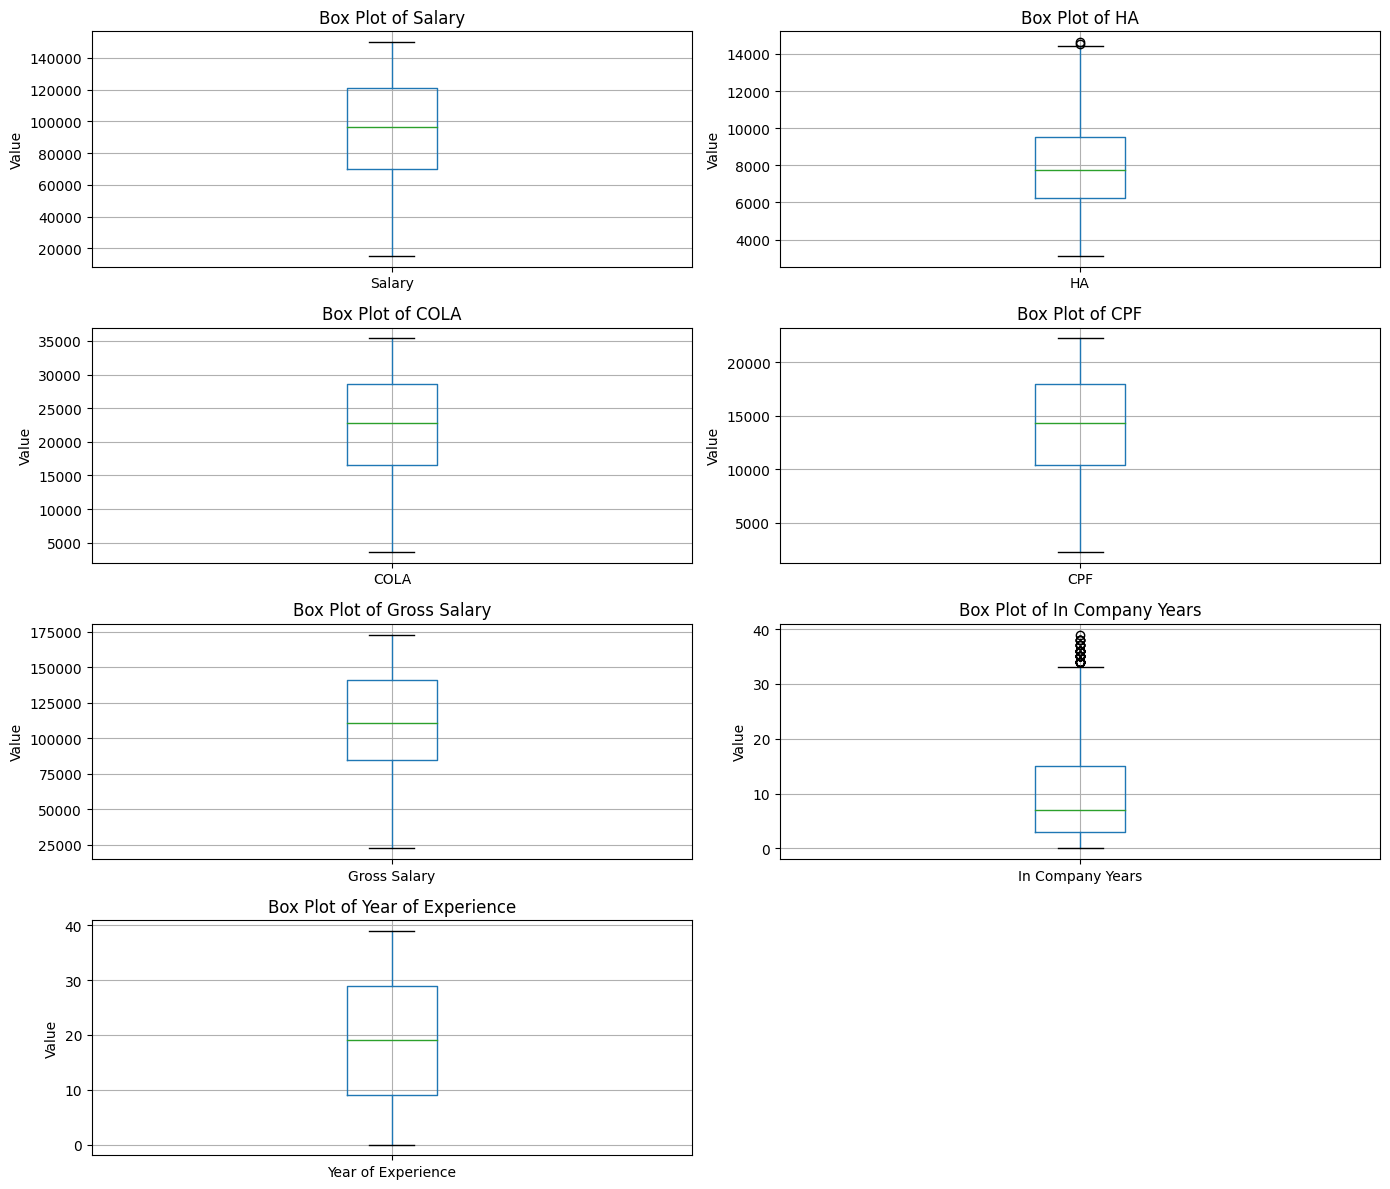

In [15]:
# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))  # 4 * 2
axes = axes.flatten()

# list of columns for individual plots
columns = ['Salary', 'HA', 'COLA', 'CPF', 'Gross Salary', 'In Company Years', 'Year of Experience']

# loop through each column and create individual box plots
for i, col in enumerate(columns):
    clean_data[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Remove the extra subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### 3.1 Inferential Statistic 

#### 3.1.1 Sampling distribution of continues variable

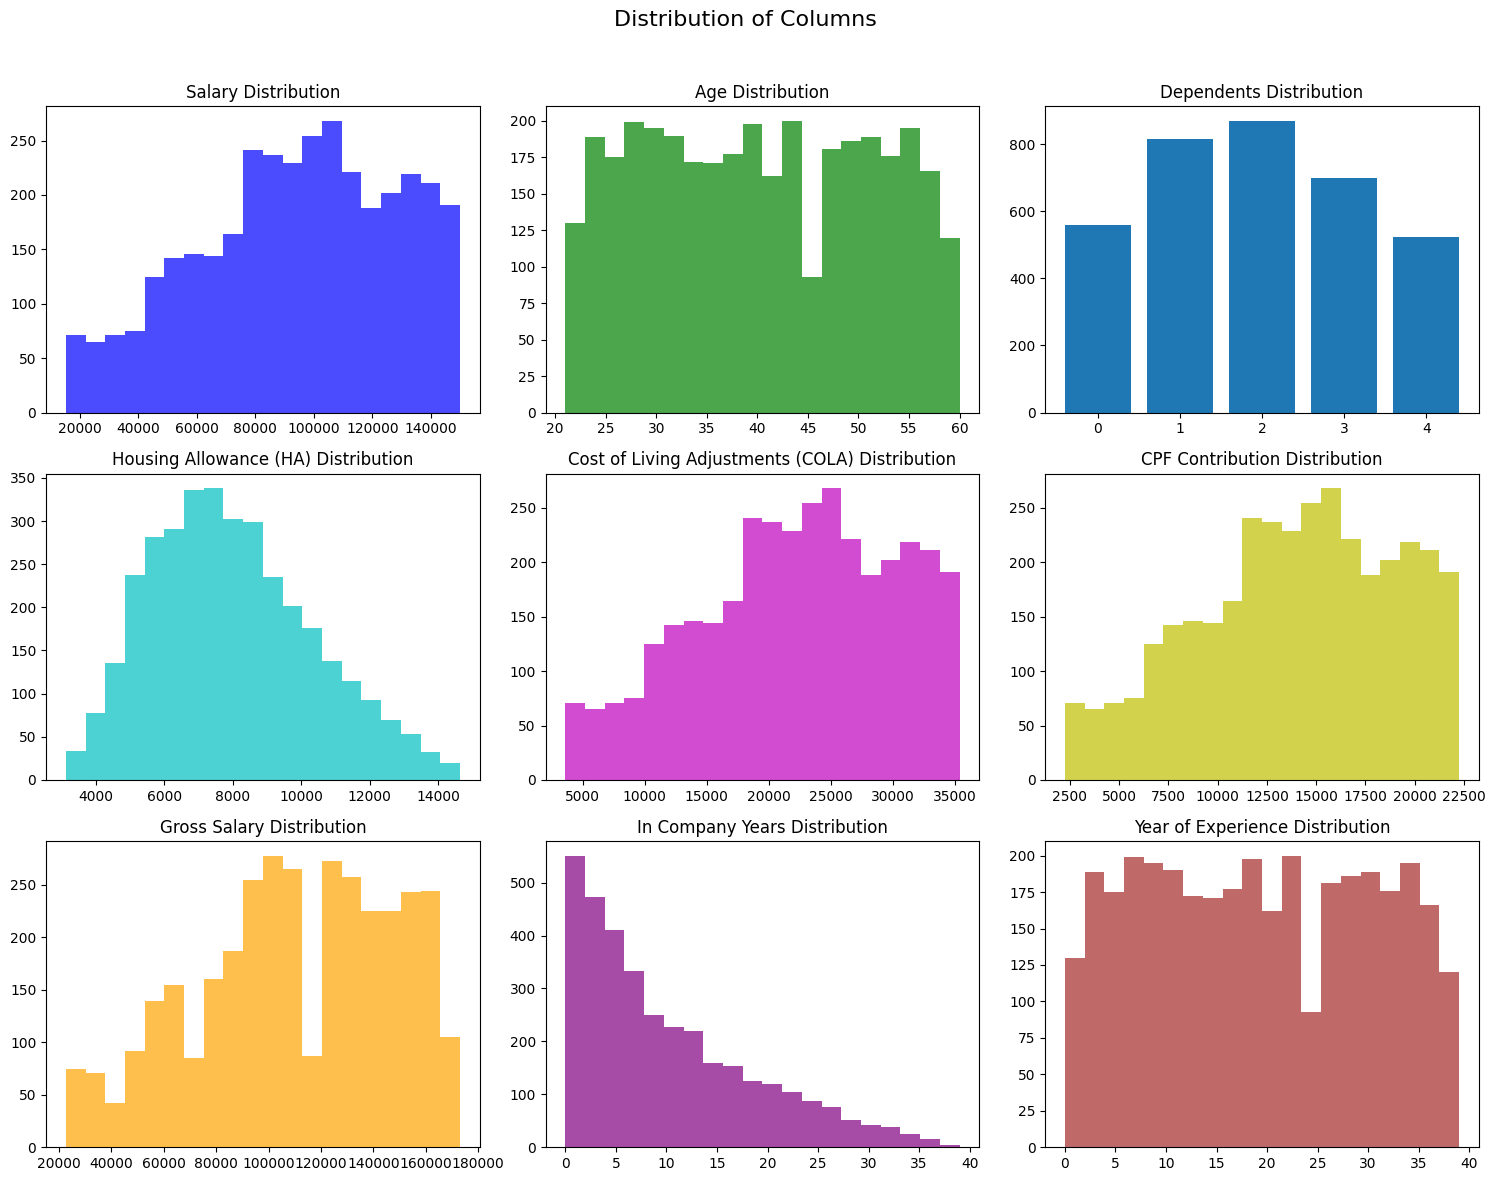

In [16]:
# 3 * 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Columns', fontsize=16)

# ploting the histograms
axes[0, 0].hist(clean_data['Salary'], bins=20, color='b', alpha=0.7)
axes[0, 0].set_title('Salary Distribution')

axes[0, 1].hist(clean_data['Age'], bins=20, color='g', alpha=0.7)
axes[0, 1].set_title('Age Distribution')

axes[0, 2].bar(dependents_sum.index, dependents_sum.values)
axes[0, 2].set_title('Dependents Distribution')

axes[1, 0].hist(clean_data['HA'], bins=20, color='c', alpha=0.7)
axes[1, 0].set_title('Housing Allowance (HA) Distribution')

axes[1, 1].hist(clean_data['COLA'], bins=20, color='m', alpha=0.7)
axes[1, 1].set_title('Cost of Living Adjustments (COLA) Distribution')

axes[1, 2].hist(clean_data['CPF'], bins=20, color='y', alpha=0.7)
axes[1, 2].set_title('CPF Contribution Distribution')

axes[2, 0].hist(clean_data['Gross Salary'], bins=20, color='orange', alpha=0.7)
axes[2, 0].set_title('Gross Salary Distribution')

axes[2, 1].hist(clean_data['In Company Years'], bins=20, color='purple', alpha=0.7)
axes[2, 1].set_title('In Company Years Distribution')

axes[2, 2].hist(clean_data['Year of Experience'], bins=20, color='brown', alpha=0.7)
axes[2, 2].set_title('Year of Experience Distribution')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Distribution analysis for department:

Mode of Department: Human Resources
                 Count  Percentage
Department                        
Human Resources    738   21.304850
IT                 695   20.063510
Marketing          684   19.745958
Finance            684   19.745958
Sales              663   19.139723


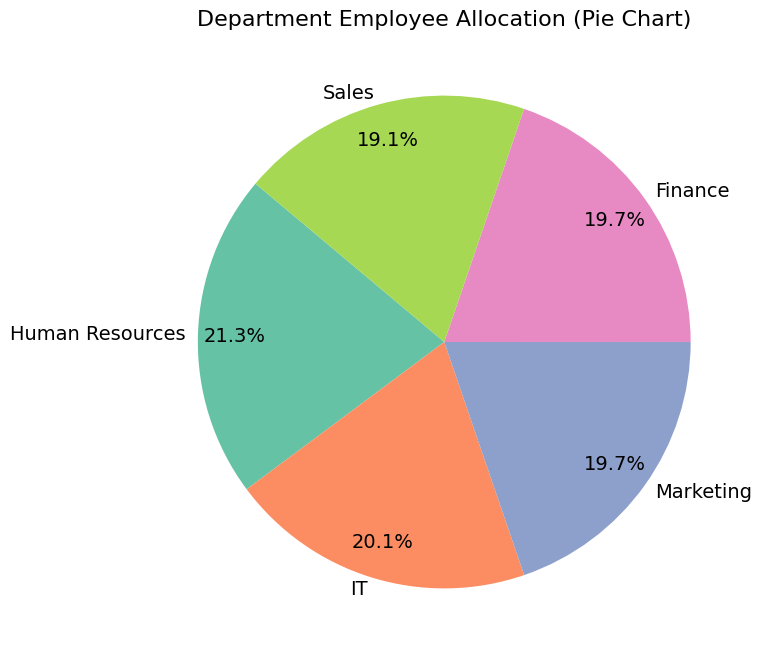

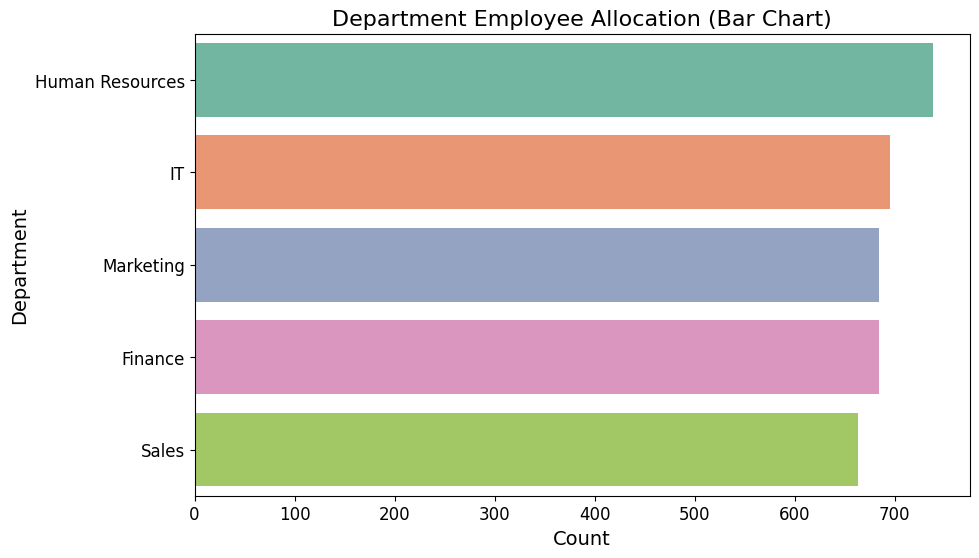

In [17]:
department_mode = clean_data['Department'].mode()[0]
print(f'Mode of Department: {department_mode}')

# calculate the percentage of each department
department_counts = clean_data['Department'].value_counts()
department_percentages = clean_data['Department'].value_counts(normalize=True) * 100 

# display count and percentage togather
department_stats = pd.DataFrame({
    'Count': department_counts,
    'Percentage': department_percentages
})

# Display the department stats as a table
print(department_stats)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_percentages, 
        labels=department_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Set2"),
        textprops={'fontsize': 14}, 
        pctdistance=0.85, 
        labeldistance=1.05
       )
plt.title('Department Employee Allocation (Pie Chart)', fontsize=16) 
plt.savefig('department_distribution_piechart.png', bbox_inches='tight')
plt.show()

# Horizontal bar plot for althernaive look
plt.figure(figsize=(10, 6))
sns.barplot(x=department_counts.values, y=department_counts.index, palette="Set2")
plt.title('Department Employee Allocation (Bar Chart)', fontsize=16) 
plt.xlabel('Count', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('department_distribution_barchart.png', bbox_inches='tight')
plt.show()

#### 3.1.2 Sampling Distribution of Categorical variable

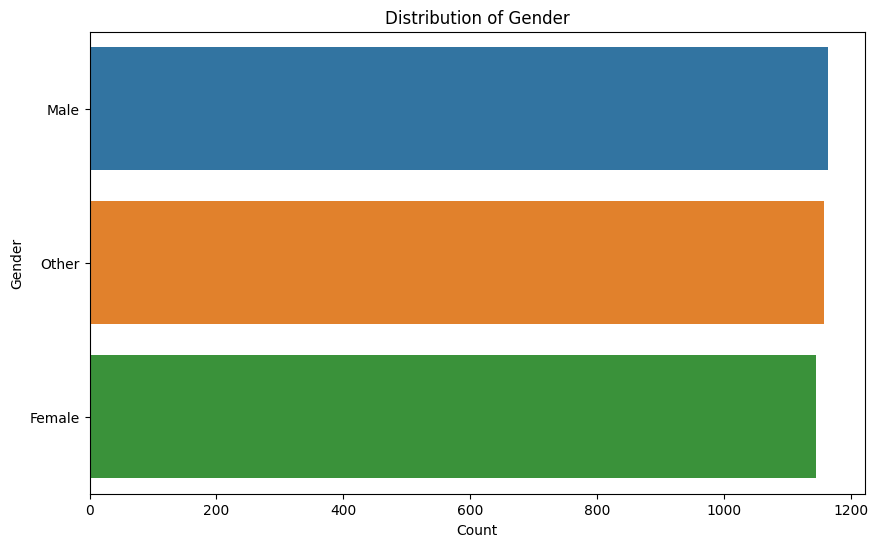

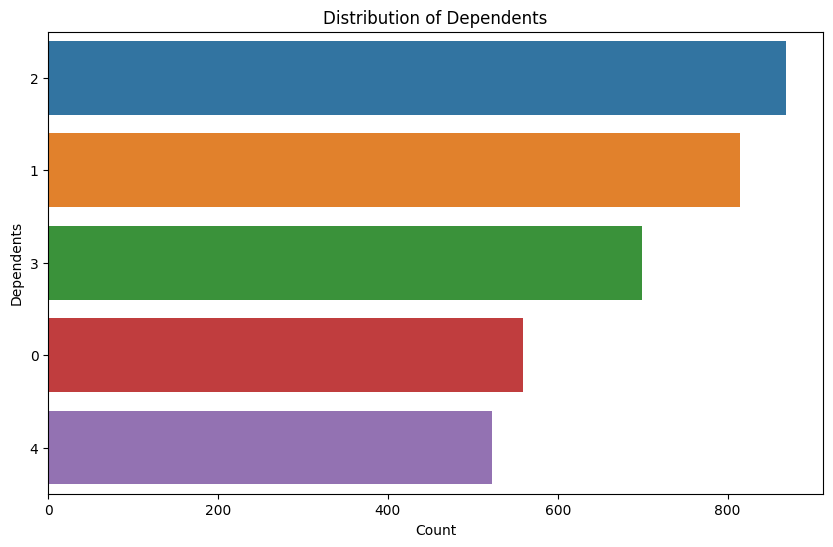

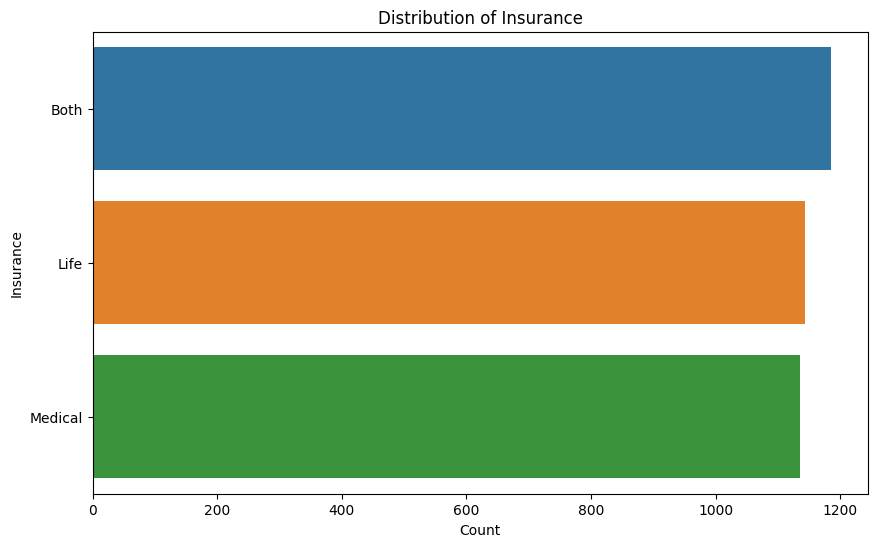

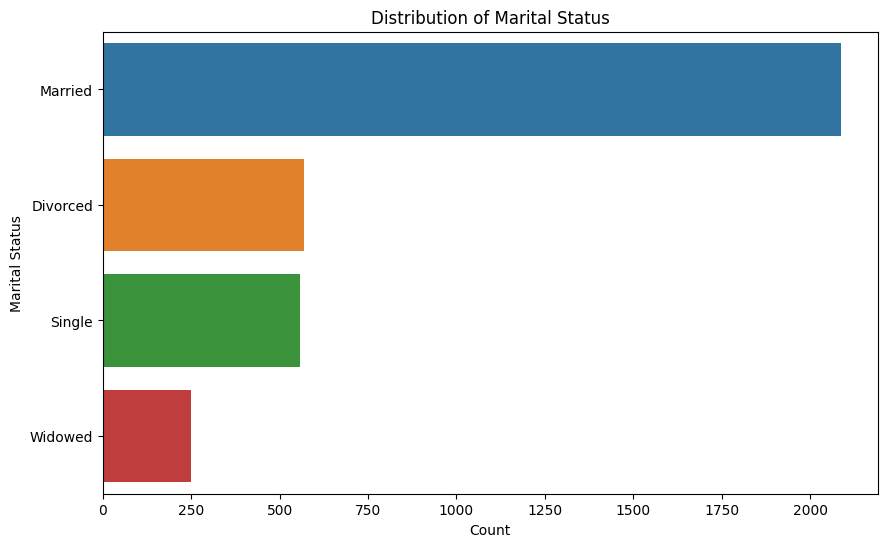

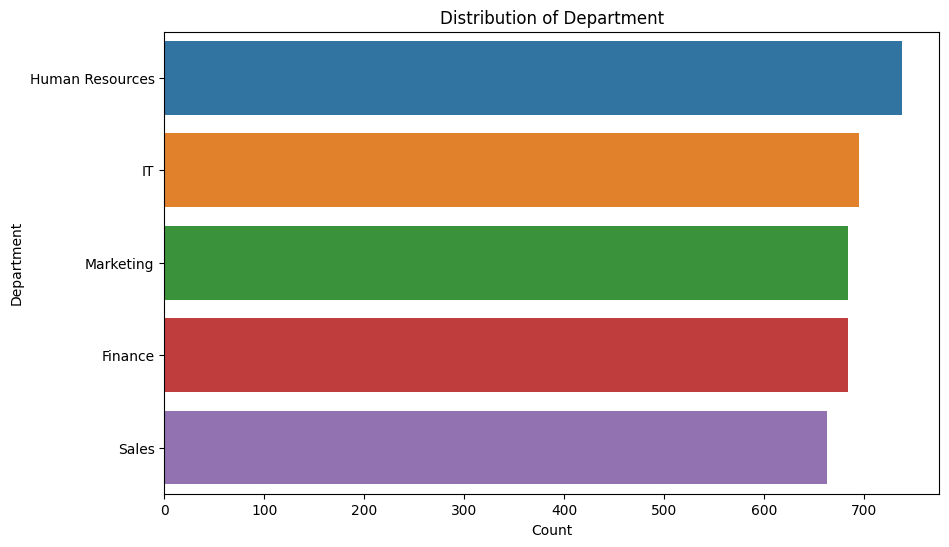

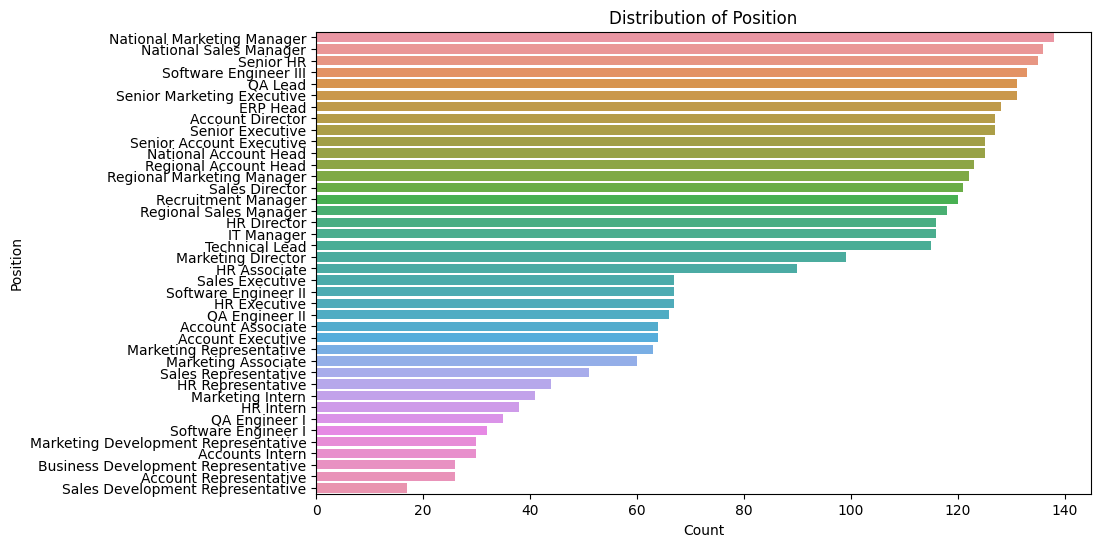

In [18]:
# Define the categorical columns
categorical_columns = ['Gender', 'Dependents', 'Insurance', 'Marital Status', 'Department', 'Position']

# Loop through each categorical column and plot a horizontal bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=clean_data, order=clean_data[col].value_counts().index)  # order by frequency
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    
    # saving for ppt
    plt.savefig(f'{col}_distribution.png', bbox_inches='tight')  # saves as .png
    plt.show()

As there are too many entries in the position variable, thus they are grouped together and categorized into Junior, Mid-level and Senior. 

#### 3.1.3 Categorise of Job position Data

In [19]:
clean_data['Position'].unique ()

array(['Regional Marketing Manager', 'National Marketing Manager',
       'National Sales Manager', 'Accounts Intern', 'Software Engineer I',
       'Account Associate', 'National Account Head', 'QA Lead',
       'Account Director', 'HR Director', 'Technical Lead',
       'Senior Marketing Executive', 'Sales Director', 'HR Executive',
       'Marketing Intern', 'Regional Sales Manager', 'ERP Head',
       'Marketing Development Representative', 'Software Engineer II',
       'HR Representative', 'Recruitment Manager', 'Senior Executive',
       'Regional Account Head', 'Marketing Representative', 'Senior HR',
       'Marketing Director', 'IT Manager', 'QA Engineer II',
       'HR Associate', 'Account Executive', 'Senior Account Executive',
       'QA Engineer I', 'Sales Executive', 'HR Intern',
       'Marketing Associate', 'Software Engineer III',
       'Sales Representative', 'Business Development Representative',
       'Sales Development Representative', 'Account Representative'],

In [20]:
# function to group positions
def group_position(position):
    if position in ['Accounts Intern', 'Marketing Intern', 'HR Intern', 'Software Engineer I', 
                    'QA Engineer I', 'Marketing Development Representative', 'Marketing Representative', 
                    'Sales Representative', 'Business Development Representative', 'Sales Development Representative', 
                    'Account Associate', 'HR Representative', 'HR Associate', 'Account Representative']:
        return 'Junior'
    elif position in ['Software Engineer II', 'QA Engineer II', 'Marketing Associate', 'HR Executive', 
                      'Senior Executive', 'Sales Executive', 'Account Executive', 'Senior Account Executive', 
                      'Technical Lead', 'Recruitment Manager', 'IT Manager', 'Regional Sales Manager', 
                      'Regional Account Head', 'Regional Marketing Manager', 'National Marketing Manager', 
                      'National Sales Manager', 'Senior Marketing Executive']:
        return 'Mid-level'
    else:
        return 'Senior'

clean_data.loc[:, 'Position_Grouped'] = clean_data.loc[:, 'Position'].apply(group_position)

C:\Users\xjie\AppData\Local\Temp\ipykernel_24788\3991610582.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'Position_Grouped'] = clean_data.loc[:, 'Position'].apply(group_position)


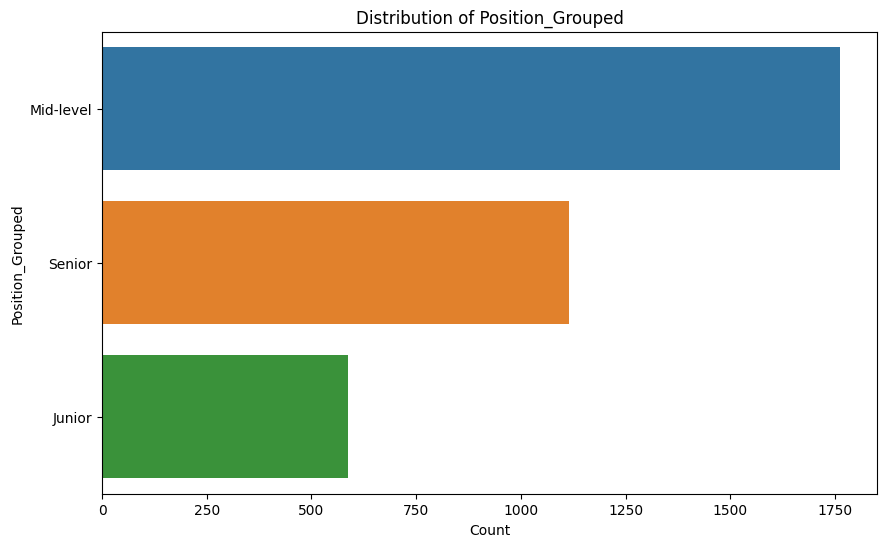

In [21]:
# Define the categorical columns
categorical_columns = ['Position_Grouped']

# Loop through columns and plot a horizontal bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=clean_data, order=clean_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### 3.2 Confidence Interval analysis of selected variables

In [22]:
# resuable code for disribution analysis
def sampling_distribution_analysis(data, column, confidence_level=0.95):
    # Sampling distribution 
    sample_data = data[column]
    
    # Fit the distribution to a normal distribution
    mu, std = stats.norm.fit(sample_data)

    # calculate lower and upper quartiles (25th and 75th percentiles)
    lower_quartile = np.percentile(sample_data, 25)
    upper_quartile = np.percentile(sample_data, 75)

    # Plot histogram and fitted distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sample_data, bins=30, density=True, alpha=0.9, color='lightblue')

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Add a vertical line for the mean
    plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
    plt.text(mu + (xmax - xmin) * 0.03, max(p) * 0.4, 'Mean', color='red', ha='center')


    # Add vertical lines for lower quartiles
    plt.axvline(lower_quartile, color='green', linestyle='dashed', linewidth=2)
    plt.text(lower_quartile + (xmax - xmin) * 0.07, max(p) * 0.6, '25th Percentile', color='green', ha='center')
    
    # Add vertical lines for upper quartiles
    plt.axvline(upper_quartile, color='blue', linestyle='dashed', linewidth=2)
    plt.text(upper_quartile+ (xmax - xmin) * 0.07 , max(p) * 0.7, '75th Percentile', color='blue', ha='center')

    # Labels and title
    plt.title(f'Distribution Fitting for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # confidence Interval
    confidence_interval = stats.norm.interval(confidence_level, loc=mu, scale=std/np.sqrt(len(sample_data)))
    
    # Print results
    print(f"{column} - Mean: {mu:.2f}, Std Dev: {std:.2f}")
    print(f"{confidence_level*100:.1f}% Confidence Interval: {confidence_interval}")
    print(f"25th Percentile: {lower_quartile:.2f}, 75th Percentile: {upper_quartile:.2f}")



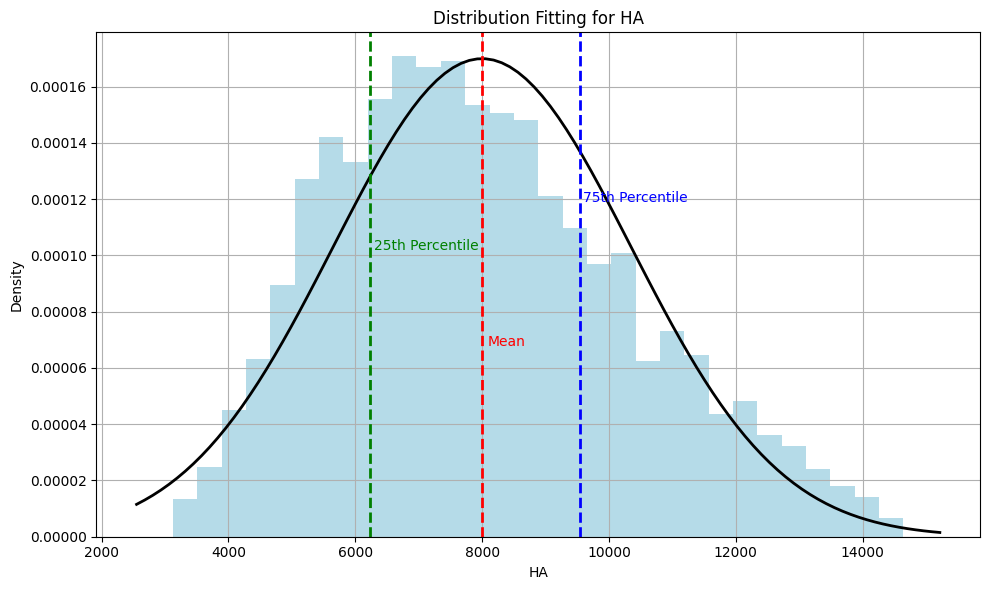

HA - Mean: 7999.39, Std Dev: 2347.40
95.0% Confidence Interval: (7921.221511378721, 8077.563478806036)
25th Percentile: 6233.58, 75th Percentile: 9535.25


In [23]:
sampling_distribution_analysis(clean_data, 'HA')

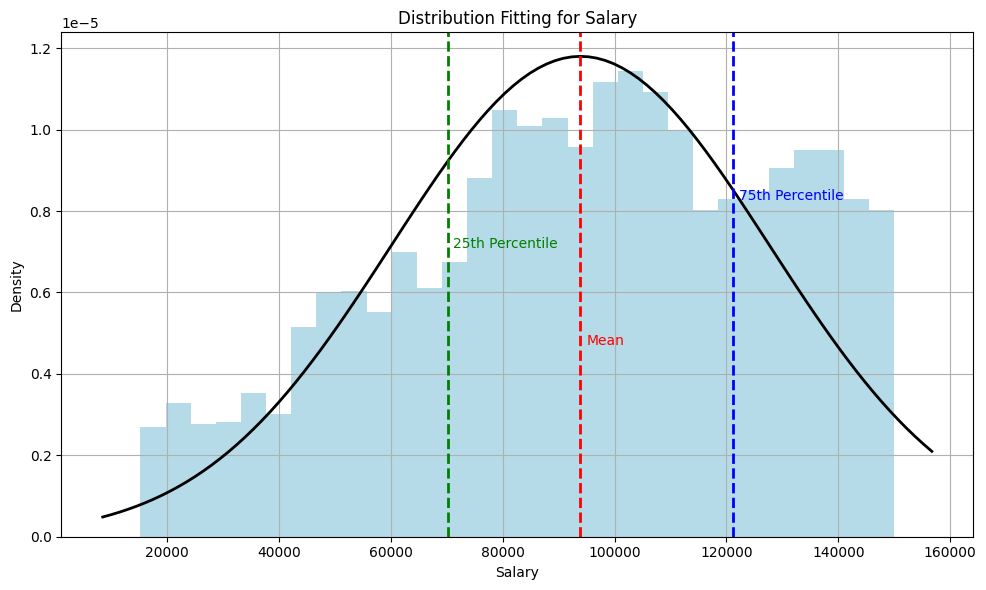

Salary - Mean: 93894.63, Std Dev: 33804.14
95.0% Confidence Interval: (92768.91525493351, 95020.34800719122)
25th Percentile: 70148.85, 75th Percentile: 121215.48


In [24]:
sampling_distribution_analysis(clean_data, 'Salary')

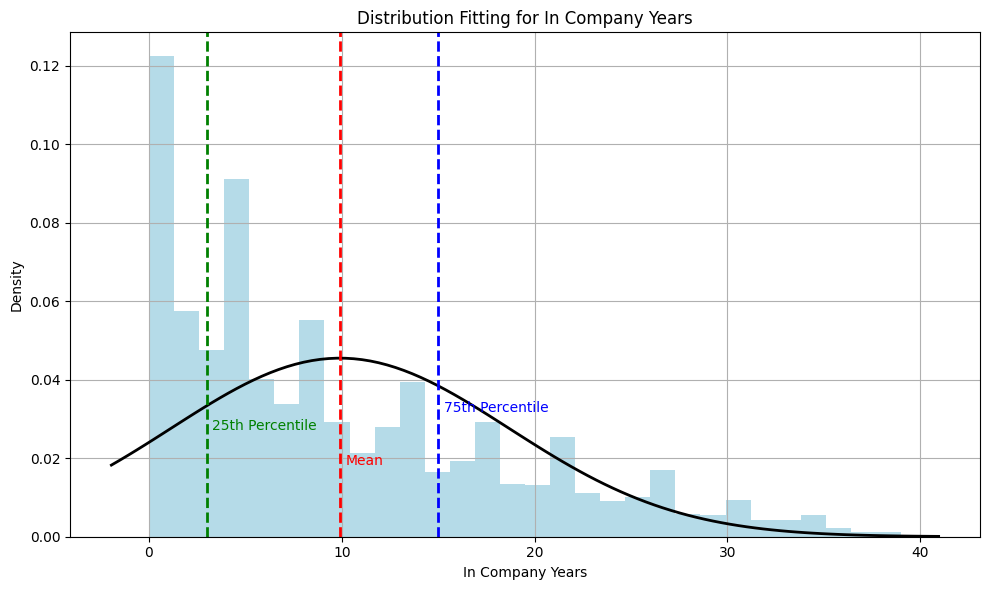

In Company Years - Mean: 9.91, Std Dev: 8.77
95.0% Confidence Interval: (9.613245041971528, 10.19737851461046)
25th Percentile: 3.00, 75th Percentile: 15.00


In [25]:
sampling_distribution_analysis(clean_data, 'In Company Years')

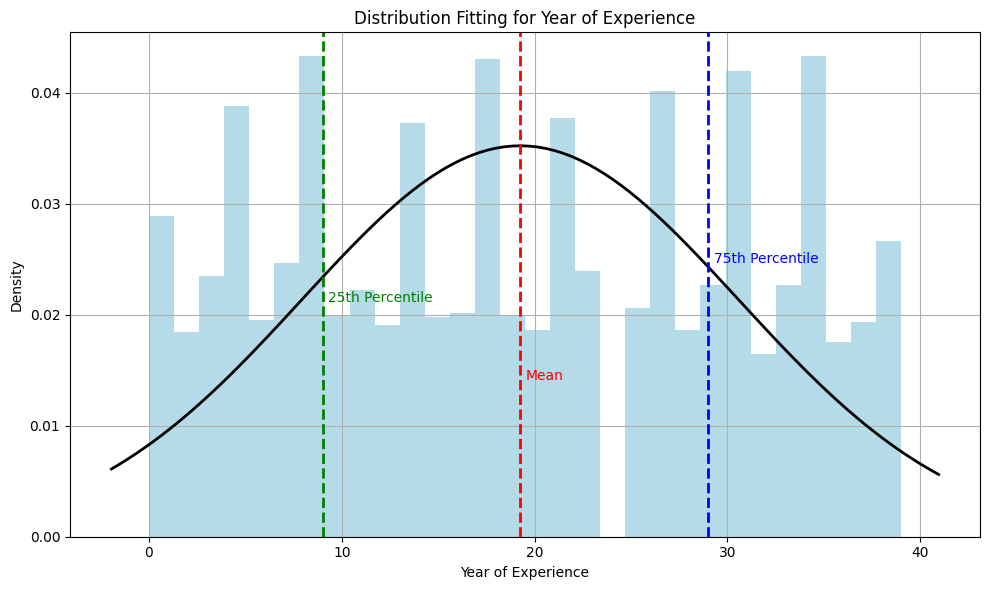

Year of Experience - Mean: 19.25, Std Dev: 11.32
95.0% Confidence Interval: (18.87360790016329, 19.6275468342478)
25th Percentile: 9.00, 75th Percentile: 29.00


In [26]:
sampling_distribution_analysis(clean_data, 'Year of Experience')

### 3.3 Data Issues

COLA and position distribution

## 4 Hypothesis Testing

Insight 1: The wide salary range indicates significant differences in roles, experience, and departments, with higher salaries driven by senior management or highly specialized roles.

Insight 2: Housing Allowance(HA) distribution is uneven, likely influenced by factors such as seniority, location, or role-specific needs

Insight 3: In Company Years indicates potential high turnover or rapid growth, suggesting a focus on retention strategies

Insight 4: Distinct experience levels suggest segmented workforce, impacting team dynamics and mentoring

#### Insight 1: The wide salary range indicates significant differences in roles, experience, and departments, with higher salaries driven by senior management or highly specialized roles.

<b>Hypothesis 1.1: Given the wide distribution of experience level of employees in the company, there is a significant difference in mean salary of employees with less than 19.25 years of experience and those with more than 19.25 years of experience. (19.25 is the mean year of experience) </b>

H₀ (Null Hypothesis): There is no significant difference in gross salary based on years of experience. <br>
H₁ (Alternative Hypothesis): Employees with more years of experience receive significantly higher gross salaries.

In [27]:
# two sample t-test
# Group 1: Employees with 19.25 or fewer years of experience
group1 = clean_data[clean_data['Year of Experience'] <= 19.25]['Gross Salary']

# Group 2: Employees with more than 19.25 years of experience
group2 = clean_data[clean_data['Year of Experience'] > 19.25]['Gross Salary']

# Set confidence level of 95%
alpha = 0.05

# Calculate sample means and standard deviations
mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
n1, n2 = len(group1), len(group2)

# Z-score calculation
z_score = (mean2 - mean1) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
print(f"Z-score: {z_score:.3f}")

# Two-tailed critical value
critical_value = stats.norm.ppf(1 - alpha / 2)
print(f"Critical value (two-tailed): {critical_value:.3f}")

# p-value calculation
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
if p_value < 1e-6:
    p_value = "< 0.001"
else:
    p_value = f"{p_value:.3f}"

print(f"p-value: {p_value}")

# print result
if abs(z_score) > critical_value:
    print("Reject H0: Employees with more years of experience have a significantly higher Gross Salary.")
else:
    print("Fail to reject H0: No significant difference in Gross Salary based on experience.")


Z-score: 65.182
Critical value (two-tailed): 1.960
p-value: < 0.001
Reject H0: Employees with more years of experience have a significantly higher Gross Salary.


<b>Hypothesis 1.2: Based on the result of hypothesis 1.1, employees with more than 19.25 years of experience have a significantly higher Gross Salary, as experience level will impact on responsibility and job expectations, we also hypothesize that employees with different roles earn significantly different salaries.</b>

H₀ (Null Hypothesis): There is no significant difference in gross salary across different roles.<br>
H₁ (Alternative Hypothesis): There is a significant difference in gross salary across different roles.

In [28]:
# ANOVA
# Group the data by 'Gender' and extract 'Gross Salary' for each group
groups = clean_data.groupby('Position')['Gross Salary']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*[group for name, group in groups])

if p_value < 0.001:
    p_value_str = "< 0.001"
else:
    p_value_str = f"{p_value:.3f}"

print(f"ANOVA for Gender and Gross Salary (controlling for Experience and Position):")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value_str}")
    
# print result
if p_value < 0.05:
    print("Reject H0: Role significantly influences Gross Salary.")
else:
    print("Fail to reject H0: No significant influence of roles on Gross Salary.")

ANOVA for Gender and Gross Salary (controlling for Experience and Position):
F-statistic: 844.362, p-value: < 0.001
Reject H0: Role significantly influences Gross Salary.


<b>Hypothesis 1.3: Based on insight 1 and hypothesis 1.1 and 1.2, we also hypothesize that employees in different departments earn significantly different salaries.</b>

H₀ (Null Hypothesis): There is no significant difference in gross salary across different departments.<br>
H₁ (Alternative Hypothesis): There is a significant difference in gross salary across different depaatments.

In [29]:
# ANOVA
# Group the data by 'Gender' and extract 'Gross Salary' for each group
groups = clean_data.groupby('Department')['Gross Salary']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*[group for name, group in groups])

print(f"ANOVA for Gender and Gross Salary (controlling for Experience and Position):")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# print result
if p_value < 0.05:
    print("Reject H0: Departments significantly influences Gross Salary.")
else:
    print("Fail to reject H0: No significant influence of departments on Gross Salary.")

ANOVA for Gender and Gross Salary (controlling for Experience and Position):
F-statistic: 3.292, p-value: 0.011
Reject H0: Departments significantly influences Gross Salary.


In [30]:
# ANOVA
# Group the data by 'Gender' and extract 'Gross Salary' for each group
groups = clean_data.groupby('Gender')['Gross Salary']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*[group for name, group in groups])

print(f"ANOVA for Gender and Gross Salary (controlling for Experience and Position):")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# print result
if p_value < 0.05:
    print("Reject H0: Departments significantly influences Gross Salary.")
else:
    print("Fail to reject H0: No significant influence of departments on Gross Salary.")

ANOVA for Gender and Gross Salary (controlling for Experience and Position):
F-statistic: 0.741, p-value: 0.477
Fail to reject H0: No significant influence of departments on Gross Salary.


<b>Insight 2 suggests that seniority and roles, reflected by the employee's position, may have a significant impact on the distribution of Housing Allowance, possibly due to senior-level employees receiving larger allowances. </b>

H₀ (Null Hypothesis): There is no significant difference in Housing Allowance across different positions (seniority and role). <br>
H₁ (Alternative Hypothesis): There is a significant difference in Housing Allowance across different positions (seniority and role).

In [31]:
# ANOVA
# Group by Position (reflecting seniority) and extract Housing Allowance for each group
groups = clean_data.groupby('Position')['HA']

# Perform ANOVA to test for differences in HA based on Position
f_stat, p_value = stats.f_oneway(*[group for name, group in groups])

if p_value < 0.001:
    p_value_str = "< 0.001"
else:
    p_value_str = f"{p_value:.3f}"

print(f"ANOVA for Housing Allowance by Position (Seniority):")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value_str}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in Housing Allowance across different positions (seniority and role).")
else:
    print("Fail to reject H0: No significant difference in Housing Allowance based on position (seniority and role).")


ANOVA for Housing Allowance by Position (Seniority):
F-statistic: 4.896, p-value: < 0.001
Reject H0: There is a significant difference in Housing Allowance across different positions (seniority and role).


<b>Based on insight 3, we would like to confirm if the company is having a high ternover or high retention rate in speficifc area.</b>

H₀ (Null Hypothesis): The mean tenure of senior employees is greater than or equal to that of junior employees.<br>
H₁ (Alternative Hypothesis): The mean tenure of senior employees is less than that of junior employees.

In [32]:
# Two sample t-test
# Define the two groups: senior and junior positions
senior_group = clean_data[clean_data['Position_Grouped'] == 'Senior']['In Company Years']
junior_group = clean_data[clean_data['Position_Grouped'] == 'Junior']['In Company Years']

# Calculate means, standard deviations, and sample sizes for both groups
mean_senior, mean_junior = np.mean(senior_group), np.mean(junior_group)
std_senior, std_junior = np.std(senior_group, ddof=1), np.std(junior_group, ddof=1)
n_senior, n_junior = len(senior_group), len(junior_group)

# Z-score calculation
z_score = (mean_senior - mean_junior) / np.sqrt((std_senior**2 / n_senior) + (std_junior**2 / n_junior))

# One-tailed critical value for 95% confidence (left-tailed)
alpha = 0.05
critical_value = stats.norm.ppf(alpha)  # Use alpha directly for left tail

# p-value calculation for one-tailed test (left tail)
p_value = stats.norm.cdf(z_score)  # CDF directly for left-tailed test

# Format p-value for small values
p_value_str = "< 0.001" if p_value < 0.001 else f"{p_value:.3f}"

print(f"One-tailed Z-test for In Company Years (Senior < Junior):")
print(f"Z-score: {z_score:.3f}, p-value: {p_value_str}")

# Conclusion based on Z-score and critical value
if z_score < critical_value:  # left-tailed test
    print("Reject H₀: Senior employees have significantly shorter tenure than Junior employees.")
else:
    print("Fail to reject H₀: No significant evidence that Senior employees have shorter tenure than Junior employees.")

One-tailed Z-test for In Company Years (Senior < Junior):
Z-score: 37.585, p-value: 1.000
Fail to reject H₀: No significant evidence that Senior employees have shorter tenure than Junior employees.


In [33]:
################################### UNUSED CODE ###################################
# Group by Department and extract In Company Years for each group
groups = clean_data.groupby('Position_Grouped')['In Company Years']

# Perform ANOVA to test if mean tenure varies across departments
f_stat, p_value = stats.f_oneway(*[group for name, group in groups])

# Format p-value for small values
if p_value < 0.001:
    p_value_str = "< 0.001"
else:
    p_value_str = f"{p_value:.3f}"

print(f"ANOVA for In Company Years by Department:")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value_str}")

# Conclusion based on p-value
if p_value < 0.05:
    print("Reject H0: There is a significant difference in In Company Years across position.")
else:
    print("Fail to reject H0: No significant difference in In Company Years across position.")


ANOVA for In Company Years by Department:
F-statistic: 365.933, p-value: < 0.001
Reject H0: There is a significant difference in In Company Years across position.


In [34]:
################################### UNUSED CODE ###################################
# Define a function to perform Z-test between two departments
# replaced by ANOVA
def z_test_between_departments(department1, department2):
    group1 = clean_data[clean_data['Department'] == department1]['Gross Salary']
    group2 = clean_data[clean_data['Department'] == department2]['Gross Salary']

    # Calculate means, standard deviations, and sample sizes for both groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    # Z-score calculation
    z_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # One-tailed critical value for 95% confidence
    alpha = 0.05
    critical_value = stats.norm.ppf(1 - alpha)

    # p-value calculation for one-tailed test
    p_value = 1 - stats.norm.cdf(z_score)

    return z_score, p_value, mean1, mean2

# List of departments
departments = ['Marketing', 'Sales', 'Finance', 'IT', 'Human Resources']

# Perform Z-tests for each pair of departments
results = {}

for i in range(len(departments)):
    for j in range(i + 1, len(departments)):
        dept1 = departments[i]
        dept2 = departments[j]
        z_score, p_value, mean1, mean2 = z_test_between_departments(dept1, dept2)
        results[f"{dept1} vs {dept2}"] = {
            'Z-score': z_score,
            'p-value': p_value,
            'Mean Salary Dept 1': mean1,
            'Mean Salary Dept 2': mean2,
            'Reject H0': p_value < 0.05
        }

# Display results
for comparison, result in results.items():
    print(f"{comparison}: Z-score = {result['Z-score']:.3f}, p-value = {result['p-value']:.3f}, "
          f"Mean Salary ({departments[0]}): {result['Mean Salary Dept 1']:.2f}, "
          f"Mean Salary ({departments[1]}): {result['Mean Salary Dept 2']:.2f}, "
          f"Reject H0: {result['Reject H0']}")

Marketing vs Sales: Z-score = -2.140, p-value = 0.984, Mean Salary (Marketing): 109836.21, Mean Salary (Sales): 114126.42, Reject H0: False
Marketing vs Finance: Z-score = -0.590, p-value = 0.722, Mean Salary (Marketing): 109836.21, Mean Salary (Sales): 111023.76, Reject H0: False
Marketing vs IT: Z-score = 0.601, p-value = 0.274, Mean Salary (Marketing): 109836.21, Mean Salary (Sales): 108629.32, Reject H0: False
Marketing vs Human Resources: Z-score = 1.230, p-value = 0.109, Mean Salary (Marketing): 109836.21, Mean Salary (Sales): 107385.20, Reject H0: False
Sales vs Finance: Z-score = 1.542, p-value = 0.061, Mean Salary (Marketing): 114126.42, Mean Salary (Sales): 111023.76, Reject H0: False
Sales vs IT: Z-score = 2.741, p-value = 0.003, Mean Salary (Marketing): 114126.42, Mean Salary (Sales): 108629.32, Reject H0: True
Sales vs Human Resources: Z-score = 3.384, p-value = 0.000, Mean Salary (Marketing): 114126.42, Mean Salary (Sales): 107385.20, Reject H0: True
Finance vs IT: Z-scor